# Fancy indexing

So we've looked at:

- simple indices (e.g `arr[0]`)
- slices (e.g `arr[:5]`)
- Boolean masks (e.g `arr[arr > 0]`)

Fancy indexing builds upon simple indexing and importantly allows us to modify and access __complicated subsests__ of an array's values

Conceptually simple: it means passing an array of indices to access multiple array elements at once.

In [82]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# we could access three different elements as follows:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
# or do so with a list of array indices for same result
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [7]:
x[[3, 7, 4]]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

In [8]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [10]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [9]:
ind = [[3, 7],[4, 5]]
x[ind]

array([[71, 86],
       [60, 20]])

In [11]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
# Like with standard indexing, the first index refers to the row, and the second to the column:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [15]:
X[[1, 2], [0, 1]]

array([4, 9])

Notice that the first value in the result is `X[0, 2]`, the second is `X[1, 1]`, and the third is `X[2, 3]`

In [17]:
# broadcasting rules apply when combining a column and row vector as indices
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Combined Indexing

Fancy indexing gets even fancier when combining with the other indexing schemes:

In [18]:
# combining simple and fancy
print(X)
X[2, [2,0,1]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  8,  9])

In [19]:
# combining slicing and fancy
X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [20]:
# and finally combining masking with fancy
mask = np.array([1, 0, 1, 0])
X[row[:, np.newaxis], mask] # row[:, np.newaxis] -> [[0],[1],[2]]

array([[1, 0, 1, 0],
       [5, 4, 5, 4],
       [9, 8, 9, 8]])

# Example: Selecting Random Points

Recap: we can use fancy indexing to select rows from a matrix easily.

In [61]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
print(X.shape)
sum(X[:, 1])

(100, 2)


18.288088177815087

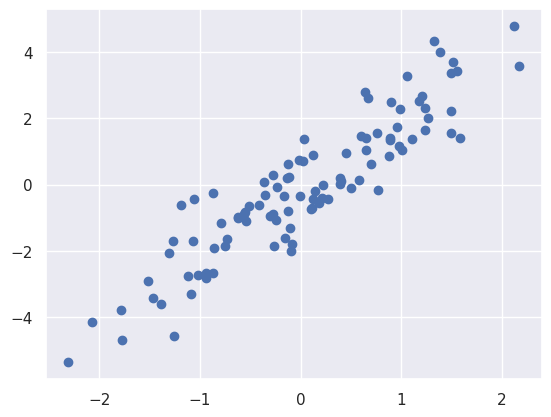

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

# plot values from first column on X and second column on Y
plt.scatter(X[:, 0], X[:, 1]);

Let's select 20 random point using fancy indexing:

- criteria: 20 random indices with no repeats

In [49]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([59, 84, 10, 37, 74, 92,  5, 72, 41, 87, 23, 86, 55, 56, 62, 40, 50,
       95, 42,  3])

In [50]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

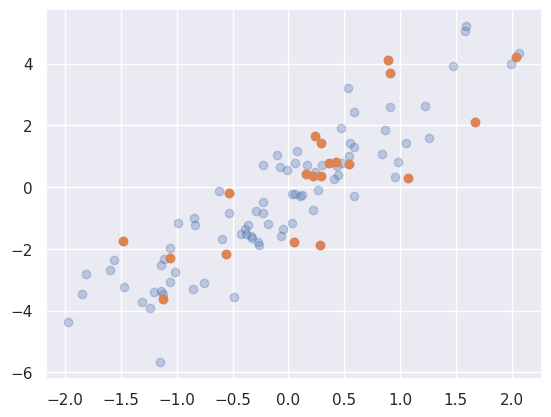

In [58]:
# using the fancy indexing, let's plot circles over the points on the graph
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) # The alpha parameter controls the transparency or opacity of the points being plotted.
plt.scatter(selection[:, 0], selection[:, 1]);

Why select a subset of data?

Often used for training test splitting for validation of statistical models.

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array:

In [68]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [69]:
# any assignment operator can be used for this
x[i] -= 10
print(x)
x[0] = 4
print(x)

[ 0 89 89  3 89  5  6  7 89  9]
[ 4 89 89  3 89  5  6  7 89  9]


In [79]:
# careful with repeated indices
x = np.zeros(10)
x[[0]] = [4]
print(x)
x[[0, 0]] = [4, 7]
print(x)
x[[0, 1]] = [4, 7]
print(x)

[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[7. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4. 7. 0. 0. 0. 0. 0. 0. 0. 0.]


In [80]:
# what's the problem with the output?
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([4., 7., 1., 1., 1., 0., 0., 0., 0., 0.])

In [81]:
# use at to solve this behaviour
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Example: Binning Data

We can use the above ideas to create a histogram by hand efficiently:

- e.g from 1,000 values, where might they fall within an array of bins?

In [87]:
np.random.seed(42)
x = np.random.randn(100)
# print(x)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
print(bin)

counts = np.zeros_like(bins)
print(counts)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)
print(i)

# add 1 to each of these bins
np.add.at(counts, i, 1)

<built-in function bin>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[11 10 11 13 10 10 13 11  9 11  9  9 10  6  7  9  8 11  8  7 13 10 10  7
  9 10  8 11  9  9  9 14 10  8 12  8 10  6  7 10 11 10 10  9  7  9  9 12
 11  7 11  9  9 11 12 12  8  9 11 12  9 10  8  8 12 13 10 12 11  9 11 13
 10 13  5 12 10  9 10  6 10 11 13  9  8  9 12 11  9 11 10 12  9  9  9  7
 11 10 10 10]


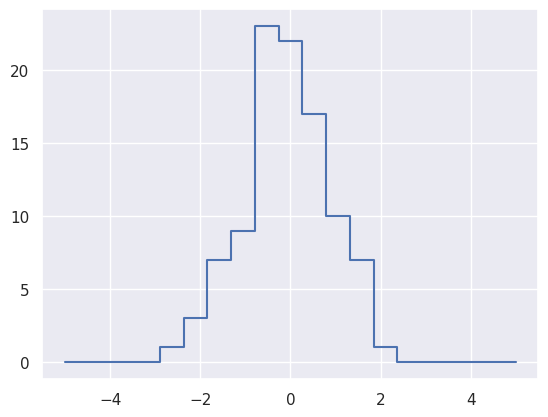

In [88]:
# plot the results
plt.step(bins, counts)
plt.show()

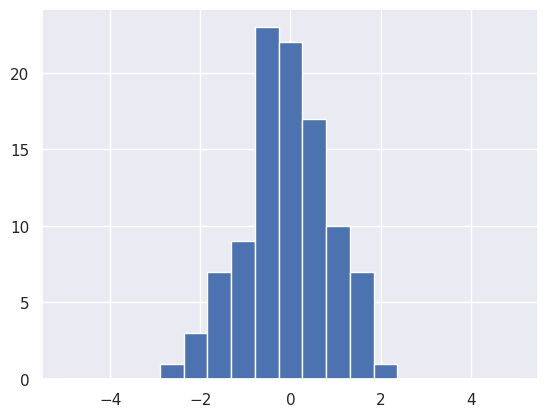

In [89]:
#alternatively
plt.hist(x, bins)
plt.show()

In [92]:
#which is quicker?
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
29.5 µs ± 8.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
30.2 µs ± 9.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Wait, our own algorithm is quicker than NumPy?

Why? Lots going on in the histogram function...

Really it's designed for better performance on far more data:

In [ ]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:


Algorithmic efficiency is never an easy question to answer.

What might work on a large dataset efficiently, may be inefficient on a small dataset, and vice-versa.

Important thing to takeaway from what you're learning is the convenience of some of these methods and when to use them!